In [41]:
!pip install fastai --upgrade -q
!pip install nbdev

In [42]:
from fastai.vision.all import *

# Dataloaders und Learners erstellen

## Download der Bilddateien von GDrive

In [3]:
!cp /content/drive/My\ Drive/saab_images/saab_images.tar.gz ./
!mkdir /content/images/
!tar -xf /content/saab_images.tar.gz -C /content/images/

In [4]:
path = Path('images')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

## Dataloader Objekt erstellen

In [5]:
cars = DataBlock(
  blocks=(ImageBlock, CategoryBlock), 
  get_items=get_image_files, 
  splitter=RandomSplitter(valid_pct=0.2, seed=42),
  get_y=parent_label,
  item_tfms=Resize(128))

In [6]:
dls = cars.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


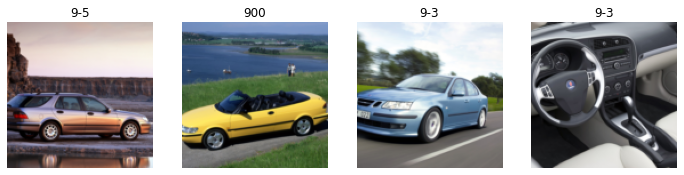

In [7]:
dls.show_batch(max_n=4, nrows=1)

## Trainieren des Learner

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.814877,2.026335,0.703448,00:26


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.992726,1.673162,0.613793,00:25
1,1.769576,1.669968,0.531034,00:25
2,1.491533,1.703894,0.572414,00:25
3,1.308498,1.703380,0.593103,00:25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


## Learner exportieren

In [9]:
learn.export('saab_cars_classifier.pkl')

In [36]:
learn.export()

In [37]:
path = Path()
path.ls(file_exts='.pkl')

(#2) [Path('saab_cars_classifier.pkl'),Path('export.pkl')]

In [13]:
# store learner on gdrive
!cp /content/saab_cars_classifier.pkl /content/drive/My\ Drive/saab_images/saab_cars_classifier.pkl

## Learner importieren / Inference

In [43]:
# copy exported learner from gdrive
!cp /content/drive/My\ Drive/saab_images/saab_cars_classifier.pkl ./

In [44]:
inference = load_learner(path/'saab_cars_classifier.pkl')

In [40]:
doc(load_learner)

In [35]:
!cp /content/saab9000.jpg /content/drive/My\ Drive/saab_images/
!cp /content/drive/My\ Drive/saab_images/saab9000.jpg ./

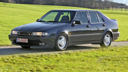

In [26]:
img = Image.open('saab9000.jpg')
img.to_thumb(128, 128)

In [27]:
inference.predict('saab9000.jpg')

('9000', tensor(3), tensor([0.0148, 0.0683, 0.2861, 0.6053, 0.0255]))

In [31]:
inference.dls.vocab

['9-3', '9-5', '900', '9000', '93']

In [32]:
inference.dls.vocab[3]

'9000'

## User-Interface hinzufügen

In [46]:
import ipywidgets as widgets

In [47]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [48]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [52]:
img = PILImage.create(btn_upload.data[-1])

In [53]:
pred,pred_idx,probs = inference.predict(img)

In [54]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: 9000; Probability: 0.6053')

In [62]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [63]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = inference.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [64]:
btn_upload = widgets.FileUpload()
widgets.VBox([widgets.Label('Select your car!'), 
      btn_upload, btn_run, out_pl, lbl_pred])